<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Perceptron" data-toc-modified-id="Perceptron-1">Perceptron</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#퍼셉트론의-기본-수식" data-toc-modified-id="퍼셉트론의-기본-수식-1.0.0.1">퍼셉트론의 기본 수식</a></span></li><li><span><a href="#퍼셉트론의-가중치-업데이트-수식" data-toc-modified-id="퍼셉트론의-가중치-업데이트-수식-1.0.0.2">퍼셉트론의 가중치 업데이트 수식</a></span></li></ul></li></ul></li><li><span><a href="#활성함수의-종류-(Activation-Function)" data-toc-modified-id="활성함수의-종류-(Activation-Function)-1.1">활성함수의 종류 (Activation Function)</a></span></li><li><span><a href="#손실-함수-(Loss-Function)" data-toc-modified-id="손실-함수-(Loss-Function)-1.2">손실 함수 (Loss Function)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Mean-Squared-Error" data-toc-modified-id="Mean-Squared-Error-1.2.0.1">Mean Squared Error</a></span></li><li><span><a href="#Mean-Absolute-Error" data-toc-modified-id="Mean-Absolute-Error-1.2.0.2">Mean Absolute Error</a></span></li><li><span><a href="#Cross-Entropy-Error" data-toc-modified-id="Cross-Entropy-Error-1.2.0.3">Cross Entropy Error</a></span></li></ul></li></ul></li><li><span><a href="#Perceptron-구현-실습" data-toc-modified-id="Perceptron-구현-실습-1.3">Perceptron 구현 실습</a></span></li></ul></li><li><span><a href="#최적화-이론" data-toc-modified-id="최적화-이론-2">최적화 이론</a></span><ul class="toc-item"><li><span><a href="#Gradient-Descent-최적화-구현" data-toc-modified-id="Gradient-Descent-최적화-구현-2.1">Gradient Descent 최적화 구현</a></span></li><li><span><a href="#Gradient-Descent-Visualization" data-toc-modified-id="Gradient-Descent-Visualization-2.2">Gradient Descent Visualization</a></span></li><li><span><a href="#역전파-알고리즘" data-toc-modified-id="역전파-알고리즘-2.3">역전파 알고리즘</a></span></li><li><span><a href="#from-scratch-수치-미분을-이용한-심층-신경망-학습" data-toc-modified-id="from-scratch-수치-미분을-이용한-심층-신경망-학습-2.4">from scratch 수치 미분을 이용한 심층 신경망 학습</a></span></li><li><span><a href="#오류역전파-이용한-심층신경망-from-scratch" data-toc-modified-id="오류역전파-이용한-심층신경망-from-scratch-2.5">오류역전파 이용한 심층신경망 from scratch</a></span><ul class="toc-item"><li><span><a href="#하이퍼파라미터-최적화-기법" data-toc-modified-id="하이퍼파라미터-최적화-기법-2.5.1">하이퍼파라미터 최적화 기법</a></span></li></ul></li><li><span><a href="#뉴럴-네트워크-학습-알고리즘-구현" data-toc-modified-id="뉴럴-네트워크-학습-알고리즘-구현-2.6">뉴럴 네트워크 학습 알고리즘 구현</a></span></li><li><span><a href="#Overfitting-방지-실습" data-toc-modified-id="Overfitting-방지-실습-2.7">Overfitting 방지 실습</a></span></li></ul></li></ul></div>

In [1]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Perceptron

#### 퍼셉트론의 기본 수식
$$ y = sign \bigg(\sum^{N-1}_{i=0} x_i \cdot w_i \bigg) $$
 
$$ sign(t) =
\begin{cases}
    +1, & \text{if t > 0} \\
    -1, & \text{otherwise}
\end{cases}$$

#### 퍼셉트론의 가중치 업데이트 수식

$$ w_{t+1} = w_t + \eta(y-\tilde y)x $$

## 활성함수의 종류 (Activation Function)

$$ tanh(x) = \dfrac{e^x - e^{-x}}{e^x + e^{-x}} $$
- -1 과 1 사이 실수값을 가짐 (이를 soft decision이라고 함. Hard decision은 예를 들어 0아니면 1을 출력하는 sign function)
- 미분 값이 0에서 1 사이임
- 입력값이 0에 가까울수록 출력이 빠르게 변함
<br>
<br>

$$ sigmoid(x) = \dfrac{1}{1 + e^{-x}} $$
- 0에서 1사이 실수값을 가짐 => 그래서 '확률'로서 표현이 가능
- 입력값이 0에 가까울수록 출력이 빠르게 변함
<br>
<br>

$$ softmax(x)_i = \dfrac{e^{x_i}}{\sum_j e^{x_j}} $$
- tanh과 sigmoid가 binary classification인 것과 다르게, softmax는 multi-class classification에 쓰임
- 각 입력의 지수함수를 정규화한 것. (모든 출력의 합이 1이 되게 하는 것)
- 각 출력은 0~1 사이 값을 가짐 => 여러 경우의 수 중 한 가지에 속할 '확률'을 표현
<br>
<br>

$$ softmax([x,0])_0 = \dfrac{e^x}{e^x + e^0} = \dfrac{1}{1 + e^{-x}} $$
- Sigmoid는 하나의 입력을 0으로 강제한 2-class softmax 함수와 같다
    - 2가지 클래스를 구분하기 위해 1개의 입력을 받는 형태
- 두번째 식에서 분모분자를 $e^x$로 나눠준 형태다.
<br>
<br>

$$ ReLU(x) = max(0, x) $$
- 0보다 작은 값을 0으로 강제하는 함수
- 미분 값이 일정(0 또는 1)해서 학습이 잘 되는 특성
- 단순한 구현으로 매우 빠른 연산이 가능
- 딥러닝에서 가장 많이 사용됌

## 손실 함수 (Loss Function)
> aka. cost function, 목적 함수, 에너지 함수

- 보통 미분 가능한 함수 사용
- 최적화 이론에서 '최소화 하고자 하는 함수'
- 성능 척도(performance measure/metrics)와 다른 점은.. 성능 척도는 학습 과정에서 사용되는 게 아니라 "정량적으로 알고리즘을 비교/평가"하기 위해 사용.
    - 또한.. 미분가능한 함수인지는 상관하지 않고, business priority/issue에 따라 성능척도를 정함
<br>
<br>

$$ \tilde \theta = \arg\min_{\theta} L(x, y; \theta) $$
- $L$: 손실함수
- $x$: 학습 데이터 입력
- $y$: 학습 데이터 정답
- $\theta$: 학습될 모든 파라미터를 모은 벡터
- $\tilde \theta$: 추정된 최적의 파라미터
<br>
<br>

#### Mean Squared Error
$$ MSE = \dfrac{1}{2}\sum_i (y_i - \tilde y_i)^2 $$
- 1\2를 앞에 써주는 거는 관습적인 건데, 미분했을 때 앞의 1/2이 1이 되도록 하기 위해 넣어주는 거다.

#### Mean Absolute Error
$$ MAE = \sum_i |y_i - \tilde y_i | $$
- outlier에 robust한 특징이 있다.
    - MSE는 오차 제곱이기 때문에 오차가 커질수록 손실함수가 빠르게 증가하는데, MAE는 오차가 커져도 손실함수가 일정하게 증가한다.
    - 통계적으로 '중간값'과 연관이 있다.
    
#### Cross Entropy Error
$$ CEE = - \sum_i y_i \log \tilde y_i $$
- multi-class classification, 예를 들어 원핫인코딩 된 레이블을 예측할 때 사용한다.
- 원핫인코딩 된 레이블 $y_i$가 곱해져 있기 때문에, 정답이 아닌 클래스(0)의 경우는 무시한다.
    - 정답인 클래스(1)에 대해서만 $ - \log \tilde y_i $ 를 반환
- 정확히 맞추면, 즉 $\tilde y$가 1이면 오차가 0, 틀릴수록 오차가 무한히 증가하는 특징이 있다.
- 오차를 내는 과정에서는 정답 클래스만 비교하지만, 파라미터를 업데이트하면 다른 클래스에 대한 확률에도 영향을 준다. 왜냐면! softmax function은 각 클래스에 대한 확률 총합이 1이니까!

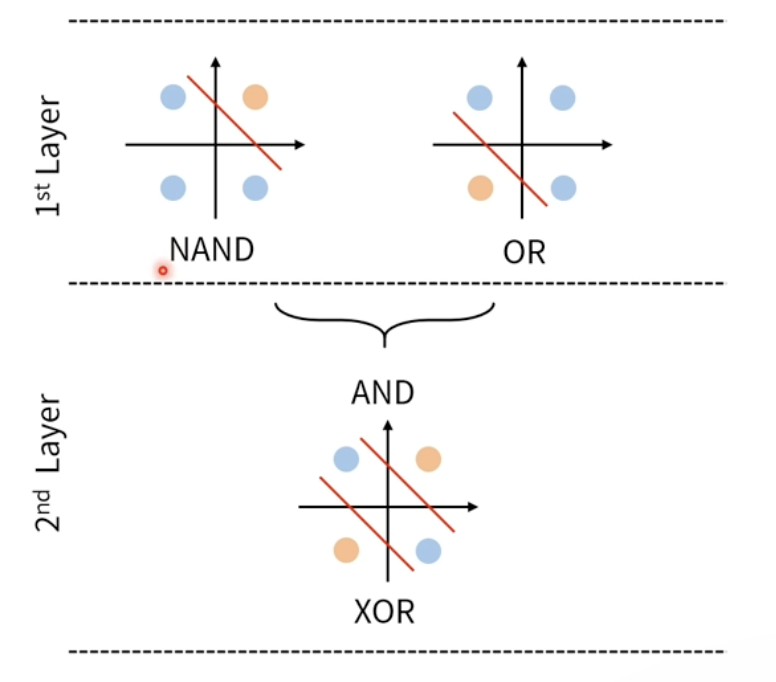

In [2]:
Image(filename='img/deep_xor.png', width=400)

- NN으로 XOR문제를 푼다는 게 이런 거다. NAND와 OR을 구해놓고, 그걸 AND로 다시 연산하면 XOR이 된다.

## Perceptron 구현 실습

In [3]:
import tensorflow as tf
import numpy as np

Init Plugin
Init Graph Optimizer
Init Kernel


In [4]:
# perceptron class

class Perceptron:
    def __init__(self, w, b):
        # 외부에서 입력 받는 numpy값을 tensor로 변환
        self.w = tf.Variable(w, dtype=tf.float32)
        self.b = tf.Variable(b, dtype=tf.float32)
    
    def __call__(self, x):
        # 내적 값을 구해서 scalar로 만들어 주고, sign function을 통과시킨다.
        return tf.sign(tf.reduce_sum(self.w * x) + self.b)

In [5]:
# utility 함수 구현
def v(*args):
    return np.array(args)

In [6]:
# perceptron 정의
w = v(1, 1)
b = 0.5

perceptron = Perceptron(w, b)

Metal device set to: Apple M1


2021-09-19 01:15:27.900294: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-19 01:15:27.900768: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
# OR 구현
p1 = perceptron(v(1, 1))  # T, T
p2 = perceptron(v(-1, 1))  # F, T
p3 = perceptron(v(-1, -1))  # F, F
p4 = perceptron(v(1, -1))  # T, F

print(p2.numpy(), p1.numpy())
print(p3.numpy(), p4.numpy())

1.0 1.0
-1.0 1.0


In [8]:
# XOR 구현

p_nand = Perceptron(w=v(-1, -1),
                    b=0.5)

p_or = Perceptron(w=v(1, 1),
                    b=0.5)

p_and = Perceptron(w=v(1, 1),
                    b=-0.5)

def xor(x):
    h1 = p_nand(x)
    h2 = p_or(x)
    return p_and(v(h1, h2))

In [9]:
p1 = xor(v(1, 1)) # T, T
p2 = xor(v(-1, 1)) # F, T
p3 = xor(v(-1, -1)) # F, F
p4 = xor(v(1, -1)) # T, F

print(p2.numpy(), p1.numpy())
print(p3.numpy(), p4.numpy())

1.0 -1.0
-1.0 1.0


# 최적화 이론

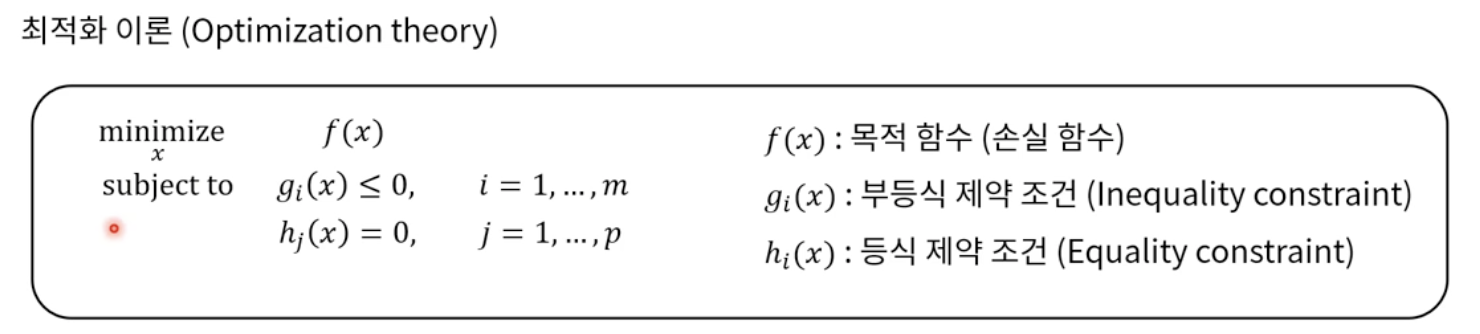

In [10]:
Image(filename='img/deep_opt.png', width=500)

- $f(x)$ 를 최소가 되게 하는 x를 구하는 문제.
    - 다만 어떠어떠한 제약 조건 하에서.. (딥러닝에서는 보통 제약조건이 없기 때문에 신경 안써도 됌)
- 최대화 문제이면 $-f(x)$로 설정하면 됌.

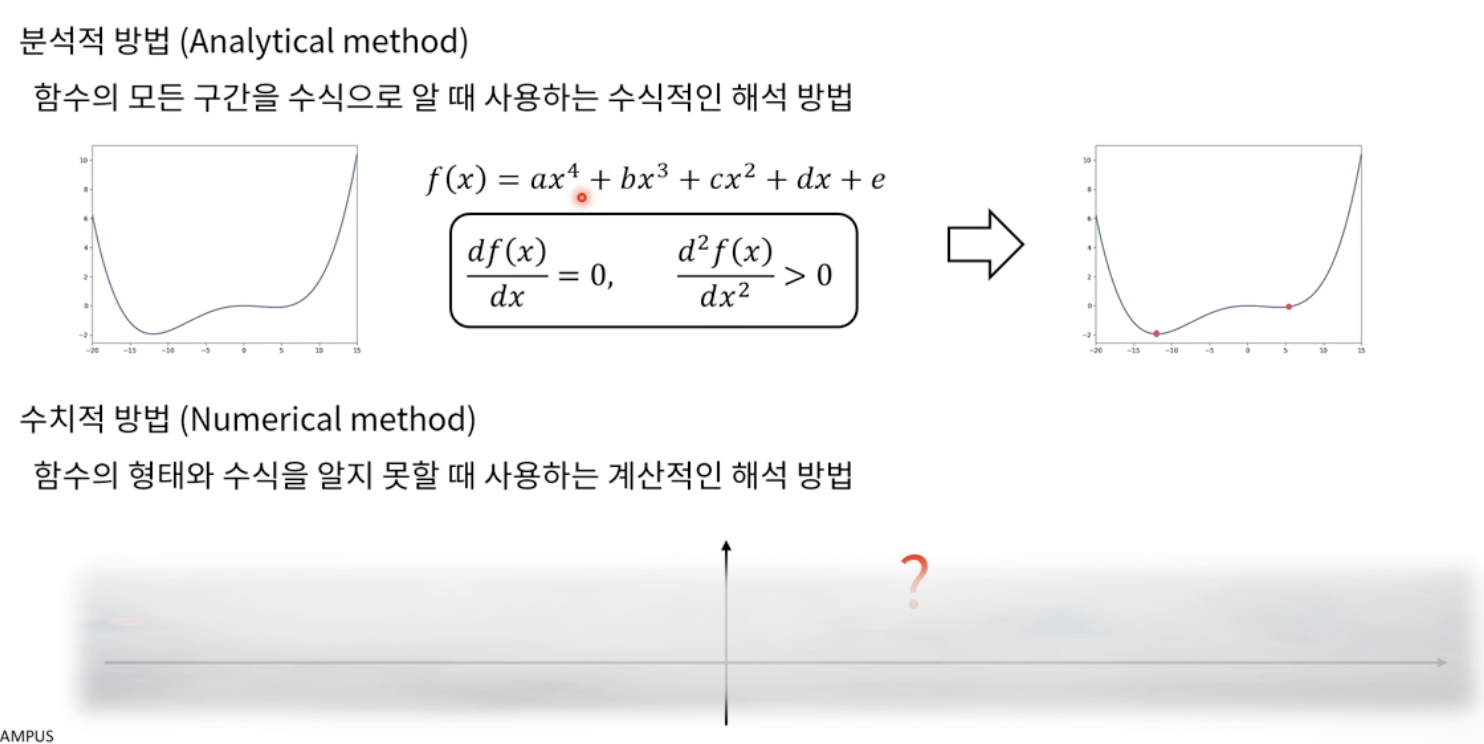

In [11]:
Image(filename='img/deep_opt2.png', width=500)

- Numerical method 중 가장 많이 쓰이는 게 "Gradient Descent"

## Gradient Descent 최적화 구현

In [12]:
# 손실함수 정의 (analytic)
import numpy as np

def f(x):
    return 0.1*x**4 - 1.5*x**3 + 0.6*x**2 + 1.0*x + 20.0

In [13]:
# 손실함수 미분 정의
def df_dx(x):
    return 0.4*x**3 - 4.5*x**2 + 1.2*x + 1.0

In [14]:
# 하이퍼파라미터 정의
x = 5
eps = 1e-5
lr = 0.01
max_epoch = 1000

In [15]:
# gradient descent algorithm 구현

def gradient_descent(initial_x, max_epoch=1000, learning_rate=0.01, eps=1e-5):
    x = initial_x
    lr = learning_rate
    
    x_log = [x] # x의 발자취 확인
    
    min_x = x  # 손실함수를 가장 작게 만드는 x 값을 구해야 한다
    min_y = f(min_x)

    for _ in range(max_epoch):
        grad = df_dx(x)
        new_x = x - lr * grad
        y = f(new_x)
        
        x_log.append(new_x) # x의 발자취 확인

        if min_y > y:
            min_x = new_x
            min_y = y

        if np.abs(x - new_x) < eps:
            break

        x = new_x
    return min_x, min_y, x_log

In [16]:
gradient_descent(5)[0:2]

(10.955323272631201, -428.84677390087836)

- 위에서 초기 x값을 -5로 하게 되면 값이 완전히 다르게 나온다.
    - **vanilla Gradient descent는 구한 minimum이 local인지 global인지 알 수가 없다.**

## Gradient Descent Visualization

In [17]:
import matplotlib.pyplot as plt

min_x1, min_y1, x_log1 = gradient_descent(5)
min_x2, min_y2, x_log2 = gradient_descent(-5)

y_log1 = f(np.array(x_log1))
y_log2 = f(np.array(x_log2))

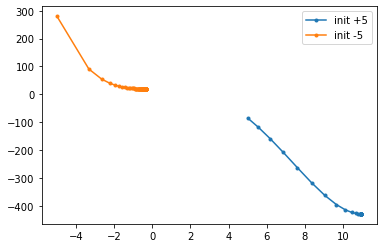

In [18]:
plt.plot(x_log1, y_log1, '.-', label='init +5')
plt.plot(x_log2, y_log2, '.-', label='init -5')
plt.legend()
plt.show()

## 역전파 알고리즘

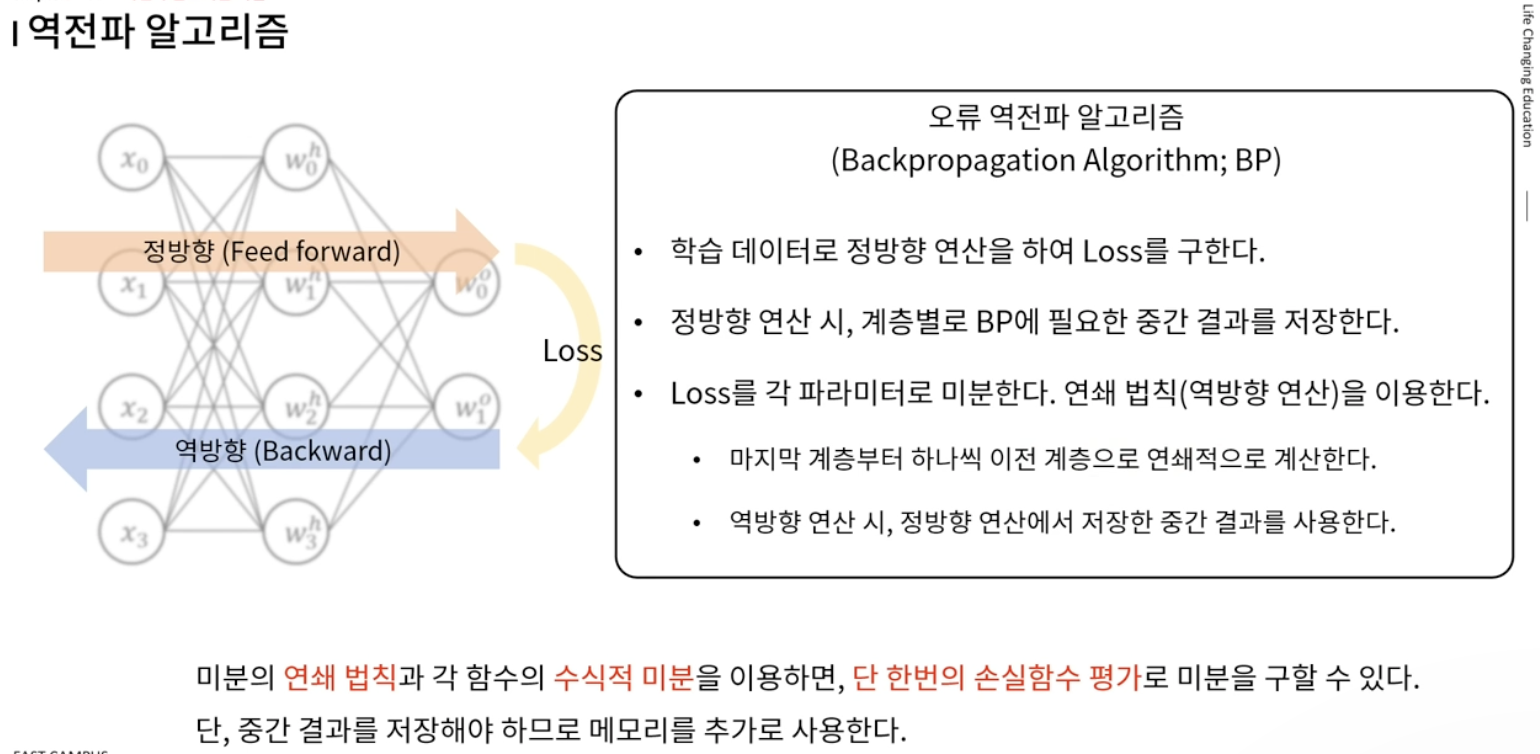

In [19]:
Image(filename='img/backpro.png', width=500)

- output 바로 전 layer의 파라미터를 수정할 때, 필요한 미분을 구해서 저장해놓고... 한 단계 더 앞으로 나아갈 때는 저장해 둔 미분을 그대로 사용하고, 그렇게 하는 거다.

## from scratch 수치 미분을 이용한 심층 신경망 학습

In [20]:
import time
import numpy as np

# utillity
def _t(x):
    return np.transpose(x)

def _m(A, B):
    return np.matmul(A, B)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(h, y):
    return 1 / 2 * np.mean(np.square(h - y))

epsilon = 0.0001

In [21]:
# Dense Layer 구현
class Dense:
    def __init__(self, W, b, a):
        self.W = W
        self.b = b
        self.a = a
        
        self.dW = np.zeros_like(self.W)  # 각각의 w에 대한 미분값을 저장할 ndarray
        self.db = np.zeros_like(self.b)
        
    def __call__(self, x):
        return self.a(_m(_t(self.W), x) + self.b)
        # weight matrix를 "input by output"으로 해주면 transpose해줘야 된다.

In [22]:
# DNN 구현
class DNN:
    def __init__(self, hidden_depth, num_neuron, num_input, num_output, activation=sigmoid):
        def init_var(i, o):
            return np.random.normal(0.0, 0.01, (i, o)), np.zeros((o,))
        
        self.sequence = list()
        
        # first hidden layer
        # weight initialization = 처음 입력 개수 by 첫번째 레이어 뉴런 개수
        W, b = init_var(num_input, num_neuron)
        self.sequence.append(Dense(W, b, activation))
        # dense layer를 sequence에 append
        
        # hidden layers
        for _ in range(hidden_depth - 1):
            W, b = init_var(num_neuron, num_neuron)
            self.sequence.append(Dense(W, b, activation))
        
        # output layer
        W, b = init_var(num_neuron, num_output)
        self.sequence.append(Dense(W, b, activation))
        
        
        
    def __call__(self, x):
        for layer in self.sequence:
            x = layer(x)
        return x

    
    def calc_gradient(self, x, y, loss_func):
        # 기존 시퀀스에서 원하는 layer 하나만 새로운 layer로 변경!
        def get_new_sequence(layer_index, new_layer):
            new_sequence = list()
            for i, layer in enumerate(self.sequence):
                if i == layer_index:
                    new_sequence.append(new_layer)
                else:
                    new_sequence.append(layer)
            
            return new_sequence
        
        # call을 쓰면 self.sequence를 eval할 수밖에 없기 때문에, eval_sequence 함수를 추가로 정의
        def eval_sequence(x, sequence):
            for layer in sequence:
                x = layer(x)
            return x
        
        
        
        loss = loss_func(self(x), y)
        # self(x)는 위의 call을 불러와서 x 입력받은 걸 출력으로 내주고 정답과 비교해서 loss를 반환한다
        
        # 각 스칼라들을 바꿔가면서 위의 loss와 비교를 해줘야 한다.
            # ww와 bb는 스칼라
        for layer_id, layer in enumerate(self.sequence):
            # 행을 먼저 돌고
            for w_i, w in enumerate(layer.W):
                # 열을 돌면서 인덱스 반환
                for w_j, ww in enumerate(w):
                    W = np.copy(layer.W)
                    # i행의 j열의 weight에 epsilon 더해준다
                    W[w_i][w_j] = ww + epsilon
                    
                    # 기존 bias와 activation 사용
                    new_layer = Dense(W, layer.b, layer.a)
                    # 기존 sequence에 위의 layer로 replace
                    new_seq = get_new_sequence(layer_id, new_layer)
                    h = eval_sequence(x, new_seq)
                    
                    # (f(x+eps) - f(x)) / eps
                    num_grad = (loss_func(h, y) - loss) / epsilon
                    layer.dW[w_i][w_j] = num_grad
                    
            for b_i, bb in enumerate(layer.b):
                b = np.copy(layer.b)
                b[b_i] = bb + epsilon
                
                new_layer = Dense(layer.W, b, layer.a)
                new_seq = get_new_sequence(layer_id, new_layer)
                h = eval_sequence(x, new_seq)
                
                num_grad = (loss_func(h, y) - loss) / epsilon
                layer.db[b_i] = num_grad
                
        return loss

In [23]:
def gradient_descent(network, x, y, loss_obj, alpha=0.01):
    loss = network.calc_gradient(x, y, loss_obj)
    for layer in network.sequence:
        layer.W += -alpha * layer.dW
        layer.b += -alpha * layer.db
    return loss

In [24]:
x = np.random.normal(0.0, 1.0, (10,))
y = np.random.normal(0.0, 1.0, (2,))

dnn = DNN(hidden_depth=10, num_neuron=32, num_input=10, num_output=2, activation=sigmoid)

t = time.time()
for epoch in range(100):
    loss = gradient_descent(dnn, x, y, mean_squared_error, 0.01)
    print('Epoch {}: Test loss {}'.format(epoch, loss))
print('{} seconds elapsed.'.format(time.time() - t))

Epoch 0: Test loss 0.040418375245952744
Epoch 1: Test loss 0.040191987152360456
Epoch 2: Test loss 0.03996687087529807
Epoch 3: Test loss 0.03974302173176909
Epoch 4: Test loss 0.03952043500268204
Epoch 5: Test loss 0.03929910593396475
Epoch 6: Test loss 0.039079029737669316
Epoch 7: Test loss 0.03886020159306343
Epoch 8: Test loss 0.03864261664771004
Epoch 9: Test loss 0.0384262700185395
Epoch 10: Test loss 0.038211156792907944
Epoch 11: Test loss 0.03799727202964197
Epoch 12: Test loss 0.037784610760079065
Epoch 13: Test loss 0.03757316798908708
Epoch 14: Test loss 0.03736293869607582
Epoch 15: Test loss 0.03715391783600419
Epoch 16: Test loss 0.03694610034036184
Epoch 17: Test loss 0.03673948111814936
Epoch 18: Test loss 0.03653405505684378
Epoch 19: Test loss 0.03632981702334554
Epoch 20: Test loss 0.03612676186492687
Epoch 21: Test loss 0.03592488441015306
Epoch 22: Test loss 0.035724179469802386
Epoch 23: Test loss 0.035524641837769114
Epoch 24: Test loss 0.03532626629195616
Epoc

## 오류역전파 이용한 심층신경망 from scratch

In [25]:
# sigmoid class
class Sigmoid:
    def __init__(self):
        self.last_o = 1

    def __call__(self, x):
        self.last_o = 1.0 / (1.0 + np.exp(-x))
        return self.last_o

    def grad(self): # sigmoid(x)(1 - sigmoid(x))
        return self.last_o * (1.0 - self.last_o)

In [26]:
# mse class
class MeanSquaredError: # 1/2 * mean((h - y)^2)  --> h - y
    def __init__(self):
        self.dh = 1
        self.last_diff = 1

    def __call__(self, h, y):
        self.last_diff = h - y
        return 1 / 2 * np.mean(np.square(self.last_diff))

    def grad(self):
        return self.last_diff

In [27]:
# DNN
class Dense:
    def __init__(self, W, b, a_obj):
        self.W = W
        self.b = b
        self.a = a_obj()
        
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        self.dh = np.zeros_like(_t(self.W))
        
        self.last_x = np.zeros((self.W.shape[0]))
        self.last_h = np.zeros((self.W.shape[1]))
        

    def __call__(self, x):
        self.last_x = x
        self.last_h = _m(_t(self.W), x) + self.b
        return self.a(self.last_h)

    def grad(self): # dy/dh = W
        return self.W * self.a.grad()

    def grad_W(self, dh):
        grad = np.ones_like(self.W)
        grad_a = self.a.grad()
        for j in range(grad.shape[1]): # dy/dw = x
            grad[:, j] = dh[j] * grad_a[j] * self.last_x
        return grad

    def grad_b(self, dh): # dy/db = 1
        return dh * self.a.grad()

In [28]:
class DNN:
    def __init__(self, hidden_depth, num_neuron, input, output, activation=Sigmoid):
        def init_var(i, o):
            return np.random.normal(0.0, 0.01, (i, o)), np.zeros((o,))

        self.sequence = list()
        # First hidden layer
        W, b = init_var(input, num_neuron)
        self.sequence.append(Dense(W, b, activation))

        # Hidden Layers
        for index in range(hidden_depth):
            W, b = init_var(num_neuron, num_neuron)
            self.sequence.append(Dense(W, b, activation))

        # Output Layer
        W, b = init_var(num_neuron, output)
        self.sequence.append(Dense(W, b, activation))

    def __call__(self, x):
        for layer in self.sequence:
            x = layer(x)
        return x

    def calc_gradient(self, loss_obj):
        loss_obj.dh = loss_obj.grad()
        self.sequence.append(loss_obj)
        
        # back-prop loop
        for i in range(len(self.sequence) - 1, 0, -1):
            l1 = self.sequence[i]
            l0 = self.sequence[i - 1]
            
            l0.dh = _m(l0.grad(), l1.dh)
            l0.dW = l0.grad_W(l1.dh)
            l0.db = l0.grad_b(l1.dh)
        
        self.sequence.remove(loss_obj)

In [29]:
def gradient_descent(network, x, y, loss_obj, alpha=0.01):
    loss = loss_obj(network(x), y)  # Forward inference
    network.calc_gradient(loss_obj)  # Back-propagation
    for layer in network.sequence:
        layer.W += -alpha * layer.dW
        layer.b += -alpha * layer.db
    return loss

In [30]:
x = np.random.normal(0.0, 1.0, (10,))
y = np.random.normal(0.0, 1.0, (2,))

t = time.time()
dnn = DNN(hidden_depth=5, num_neuron=32, input=10, output=2, activation=Sigmoid)
loss_obj = MeanSquaredError()
for epoch in range(100):
    loss = gradient_descent(dnn, x, y, loss_obj, alpha=0.01)
    print('Epoch {}: Test loss {}'.format(epoch, loss))
print('{} seconds elapsed.'.format(time.time() - t))

Epoch 0: Test loss 0.26580771213688
Epoch 1: Test loss 0.2628204725014082
Epoch 2: Test loss 0.25986850900264125
Epoch 3: Test loss 0.25695284971243754
Epoch 4: Test loss 0.25407443007446284
Epoch 5: Test loss 0.25123409347312425
Epoch 6: Test loss 0.2484325922648867
Epoch 7: Test loss 0.24567058923682059
Epoch 8: Test loss 0.24294865945507896
Epoch 9: Test loss 0.2402672924645363
Epoch 10: Test loss 0.2376268948000106
Epoch 11: Test loss 0.23502779276929106
Epoch 12: Test loss 0.23247023546854578
Epoch 13: Test loss 0.22995439799153047
Epoch 14: Test loss 0.22748038479529778
Epoch 15: Test loss 0.22504823318674588
Epoch 16: Test loss 0.22265791689628522
Epoch 17: Test loss 0.22030934970707505
Epoch 18: Test loss 0.2180023891106293
Epoch 19: Test loss 0.2157368399620564
Epoch 20: Test loss 0.21351245811072428
Epoch 21: Test loss 0.21132895398469403
Epoch 22: Test loss 0.20918599610978808
Epoch 23: Test loss 0.20708321454663137
Epoch 24: Test loss 0.20502020423138503
Epoch 25: Test loss

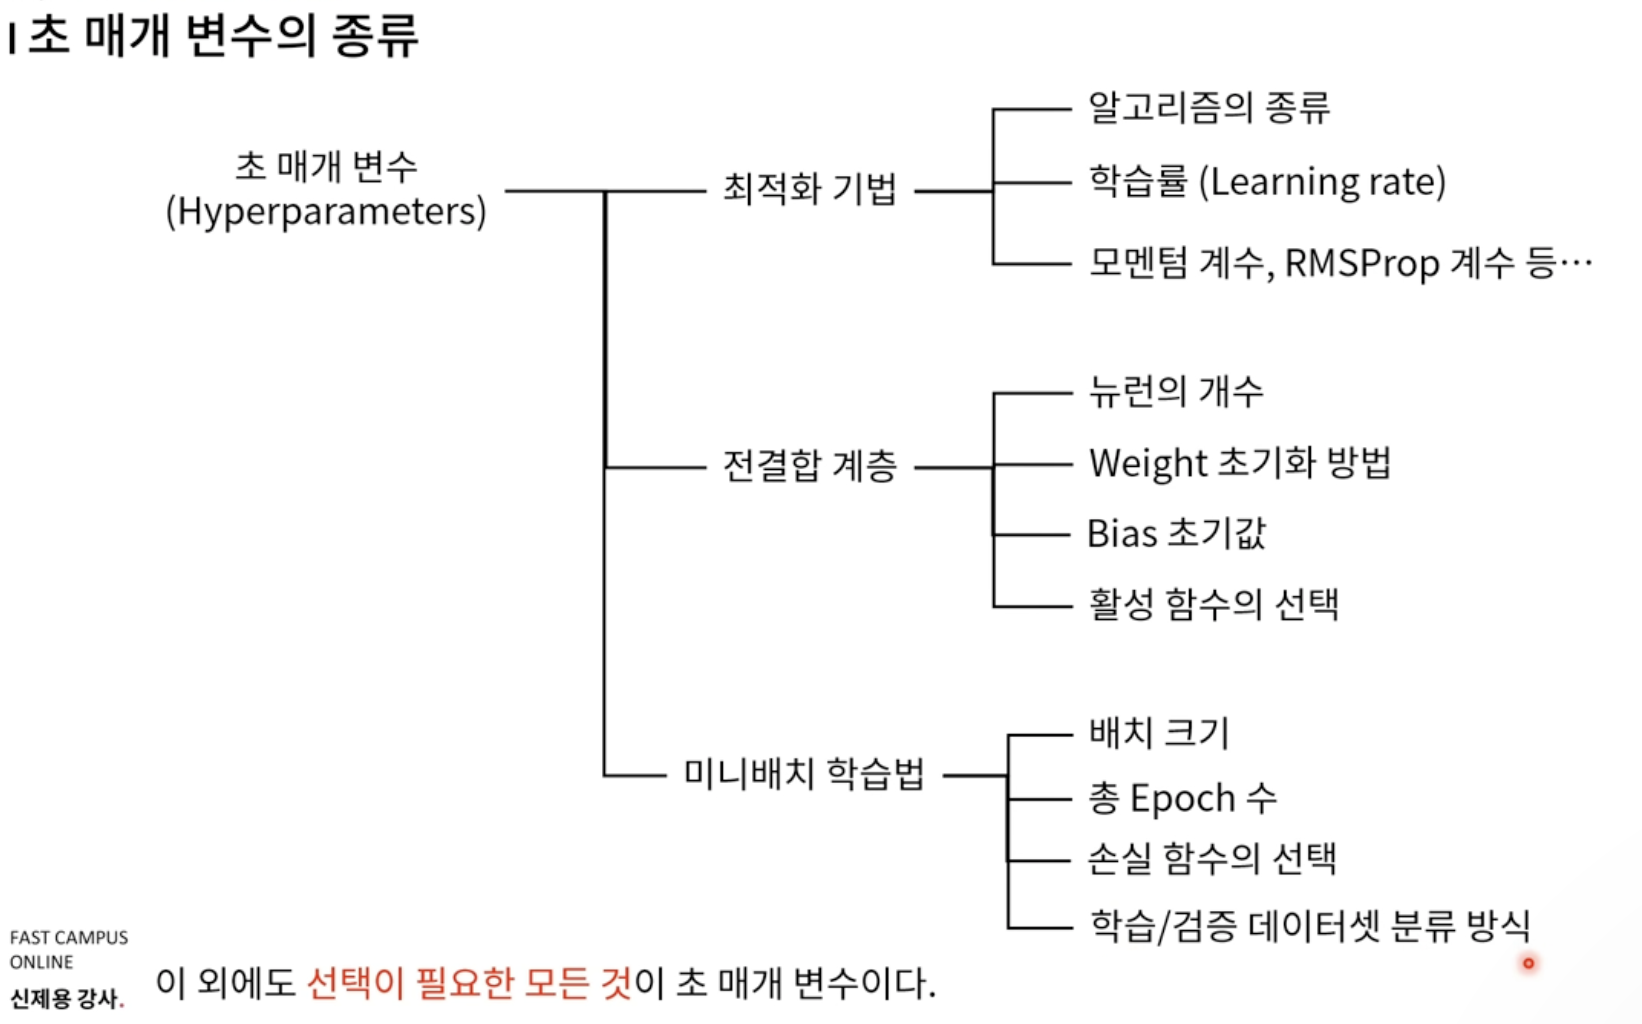

In [31]:
Image(filename='img/hyper.png', width=500)

### 하이퍼파라미터 최적화 기법
- Grid Search
- Random Search
- Bayesian Optimization

## 뉴럴 네트워크 학습 알고리즘 구현

In [32]:
import tensorflow as tf

In [33]:
# hyperparameters
EPOCHS = 10

In [34]:
# network structure
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=(28,28))
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(128, activation='relu')
        self.dense4 = tf.keras.layers.Dense(256, activation='relu')
        # 지금 사용할 MNIST 데이터셋은 클래스 레이블이 10개, 그리고 multi-class classification에 쓰이는 activation func는 softmax로 정해져 있음
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')
    
    def call(self, x, training=None, mask=None):
        # __init__ 에서 사용할 input, layers, output을 정의해주고,
        # __call__ 에서 어떻게 사용할건지 순서를 정해주면 된다.
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return self.dense5(x)

In [35]:
# 학습 함수 구현

# tf function 데코레이터 활용하면, 아래 연산들이 모두 tf에 최적화된 형태(autograph)로 돌아감
@tf.function
def train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy):
    with tf.GradientTape() as tape:
        predictions = model(images)
        # 예를 들어.. images에 size=32인 batch가 들어왔다면,
        # predictions는 32x10 형태가 될 것이다. (batchsize x classes)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [36]:
# 테스트 함수 구현
@tf.function
def test_step(model, images, labels, loss_object, test_loss, test_accuracy):
    predictions = model(images)
    loss = loss_object(labels, predictions)
    
    test_loss(loss)
    test_accuracy(labels, predictions)

In [37]:
# 데이터 불러오기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1024).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [38]:
model = MyModel()

In [39]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:
# 손실함수 및 최적화 알고리즘 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
# 위의 y_train 데이터 형태를 sparse representation이라고도 부른다.
# predictions을 하면, 우리는 batch size x classes 의 행렬을 얻는데, 만약 y_train이 똑같이 batch size x classes(one-hot-encoded) 였으면, 그냥 CategoricalCrossentropy를 쓰면 되는거다.

optimizer = tf.keras.optimizers.Adam()

In [41]:
# 성능 지표
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [42]:
# 학습 루프 구현
for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy)
    
    for images, labels in test_ds:
        test_step(model, images, labels, loss_object, test_loss, test_accuracy)
        
    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch + 1,
                          train_loss.result(),
                          train_accuracy.result() * 100,
                          test_loss.result(),
                          test_accuracy.result() * 100))
    
    train_loss.reset_state()
    train_accuracy.reset_state()
    test_loss.reset_state()
    test_accuracy.reset_state()

2021-09-19 01:16:26.058733: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-19 01:16:26.061290: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-09-19 01:16:26.061771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-19 01:16:32.755796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-19 01:16:33.508149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1, Loss: 0.28733277320861816, Accuracy: 91.17500305175781, Test Loss: 0.16097214818000793, Test Accuracy: 94.96000671386719
Epoch 2, Loss: 0.14323408901691437, Accuracy: 95.60333251953125, Test Loss: 0.1601785123348236, Test Accuracy: 95.15000915527344
Epoch 3, Loss: 0.1085854321718216, Accuracy: 96.66000366210938, Test Loss: 0.13919201493263245, Test Accuracy: 96.16000366210938
Epoch 4, Loss: 0.09080804884433746, Accuracy: 97.14500427246094, Test Loss: 0.13914142549037933, Test Accuracy: 96.29000091552734
Epoch 5, Loss: 0.08063006401062012, Accuracy: 97.47999572753906, Test Loss: 0.1236838698387146, Test Accuracy: 96.74000549316406
Epoch 6, Loss: 0.07044863700866699, Accuracy: 97.75666809082031, Test Loss: 0.12952299416065216, Test Accuracy: 96.68000030517578
Epoch 7, Loss: 0.06096043065190315, Accuracy: 98.04166412353516, Test Loss: 0.1490674465894699, Test Accuracy: 96.4000015258789
Epoch 8, Loss: 0.05699405074119568, Accuracy: 98.13500213623047, Test Loss: 0.11744854599237442

## Overfitting 방지 실습

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [44]:
EPOCHS = 50

In [45]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()   # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(64, activation='relu')
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  
        # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return self.dense5(h)

In [46]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

In [47]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Epoch 1/50
  16/1875 [..............................] - ETA: 13s - loss: 2.1525 - accuracy: 0.2500

2021-09-19 01:17:46.276069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.5249 - accuracy: 0.8102

2021-09-19 01:17:55.940754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5247 - accuracy: 0.8103 - val_loss: 0.4747 - val_accuracy: 0.8273
Epoch 2/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3833 - accuracy: 0.8588 - val_loss: 0.4152 - val_accuracy: 0.8534
Epoch 3/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3475 - accuracy: 0.8720 - val_loss: 0.3847 - val_accuracy: 0.8604
Epoch 4/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3253 - accuracy: 0.8800 - val_loss: 0.3725 - val_accuracy: 0.8631
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3100 - accuracy: 0.8848 - val_loss: 0.3480 - val_accuracy: 0.8735
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2952 - accuracy: 0.8902 - val_loss: 0.3673 - val_accuracy: 0.8653
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2835 - accuracy: 0.8963 - val_loss: 0.3701 - val_accuracy: 0.8

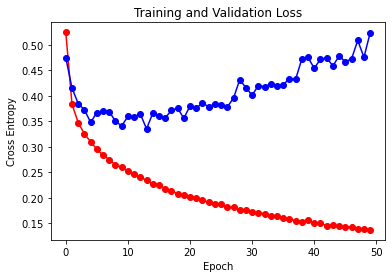

In [49]:
# visualization
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
# Early stopping callback
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [51]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1377 - accuracy: 0.9467 - val_loss: 0.5385 - val_accuracy: 0.8787
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1349 - accuracy: 0.9485 - val_loss: 0.4775 - val_accuracy: 0.8902
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1355 - accuracy: 0.9487 - val_loss: 0.5088 - val_accuracy: 0.8855
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1308 - accuracy: 0.9498 - val_loss: 0.4836 - val_accuracy: 0.8826
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1316 - accuracy: 0.9498 - val_loss: 0.5340 - val_accuracy: 0.8917
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1306 - accuracy: 0.9500 - val_loss: 0.5448 - val_accuracy: 0.8821
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1267 - accuracy: 0.9515 - val_loss: 0.5763 - val_ac

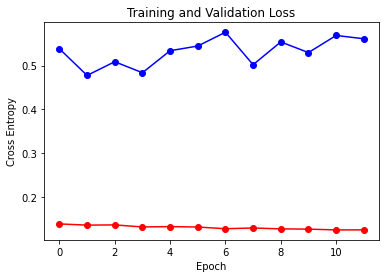

In [52]:
# visualization
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
# DROPOUT
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()   # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout4 = tf.keras.layers.Dropout(0.5) # dropout은 보통 뒤 쪽 레이어에 적용한다
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  
        # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        h = self.dropout4(h) # dense4 layer의 출력 중 반을 dropout한다
        return self.dense5(h)

In [54]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1219 - accuracy: 0.9537 - val_loss: 0.5681 - val_accuracy: 0.8823
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1236 - accuracy: 0.9530 - val_loss: 0.5749 - val_accuracy: 0.8842
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1205 - accuracy: 0.9543 - val_loss: 0.5493 - val_accuracy: 0.8863
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1204 - accuracy: 0.9535 - val_loss: 0.5777 - val_accuracy: 0.8855
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1182 - accuracy: 0.9544 - val_loss: 0.6071 - val_accuracy: 0.8783
Epoch 6/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1194 - accuracy: 0.9543 - val_loss: 0.5676 - val_accuracy: 0.8793
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1152 - accuracy: 0.9561 - val_loss: 0.5796 - val_ac

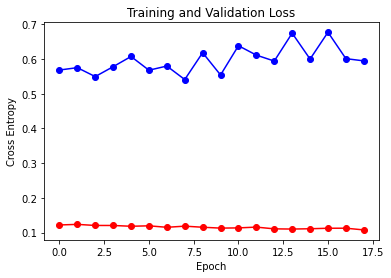

In [55]:
# visualization
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()